In [1]:

# import records
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
%matplotlib inline


In [2]:

! ls
%cd Data

BootcampStats.ipynb
Data
HowToBreakIntoTheField.ipynb
Life_expectancy_Europe.ipynb
PredictSalary.ipynb
README.md
Salary.ipynb
Salary_ML.py
C:\Users\User\Desktop\Udacity_projects\retire_to_europe\Data


In [3]:
# importing all files at once using the glob method. Source: https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688
files = glob.glob('*.csv')
print ("Number of files: ", len(files))
dataframes = []
for f in files:
    print(f)
    dataframes.append(pd.read_csv(f), )
print ("Number of dataframes: ", len(dataframes))
    

Number of files:  21
close_relations_2015.csv
crime_2016.csv
env_satisfaction_2013.csv
gdp_2016.csv
job_satisfaction_2013.csv
leisure_satisfaction_2013.csv
life_expectancy_2016.csv
life_satisfaction_2013.csv
low_savings_2016.csv
make_ends_meet_2016.csv
median_income_2016.csv
perceived_health_2016.csv
pollution_2016.csv
population_2011.csv
trust_in_legal_2013.csv
trust_in_police_2013.csv
trust_in_politics_2013.csv
underemployment_2016.csv
unemployment_2016.csv
weather.csv
work_hours_2016.csv
Number of dataframes:  21


In [4]:
# check if all dataframes have the same number of records (all European countries), check number of expected columns in final df

n_col = 0
for df in dataframes:
    print(df.shape)
    n_col += df.shape[1] -1 #subtract column with country names
n_col = n_col + 1 #added again column with country names (just once)
n_col

(32, 2)
(32, 2)
(32, 4)
(32, 2)
(32, 4)
(32, 4)
(32, 2)
(32, 4)
(32, 2)
(32, 7)
(32, 2)
(32, 6)
(32, 2)
(32, 3)
(32, 2)
(32, 2)
(32, 2)
(32, 2)
(32, 2)
(32, 17)
(32, 2)


55

In [5]:
# merge all dataframes to one dataframe with multiple columns and check that the shape is as expected

dfs = [df.set_index(['country']) for df in dataframes]
df_europe = pd.concat(dfs, axis=1).reset_index()
df_europe.head()
df_europe.shape

(32, 55)

In [6]:
# check if nulls
df_europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    32 non-null     object 
 1   prct_close_relat         32 non-null     float64
 2   prct_rpt_crime           32 non-null     float64
 3   prct_env_satis_high      32 non-null     float64
 4   prct_env_satis_med       32 non-null     float64
 5   prct_env_satis_low       32 non-null     float64
 6   gdp                      32 non-null     float64
 7   prct_job_satis_high      32 non-null     float64
 8   prct_job_satis_med       32 non-null     float64
 9   prct_job_satis_low       32 non-null     float64
 10  prct_leisure_satis_high  32 non-null     float64
 11  prct_leisure_satis_med   32 non-null     float64
 12  prct_leisure_satis_low   32 non-null     float64
 13  life_expect              32 non-null     float64
 14  prct_life_satis_high     32 

In [7]:
# remove columns in the weather dataframe with structure "Unnamed: x" after cheching that it is not a conversion error
# but already the original .csv file contained empty columns

df_europe = df_europe.dropna(axis='columns')

# rename index column to country
df_europe.rename(columns={'index': "country"}, inplace=True)
df_europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  32 non-null     object 
 1   prct_close_relat         32 non-null     float64
 2   prct_rpt_crime           32 non-null     float64
 3   prct_env_satis_high      32 non-null     float64
 4   prct_env_satis_med       32 non-null     float64
 5   prct_env_satis_low       32 non-null     float64
 6   gdp                      32 non-null     float64
 7   prct_job_satis_high      32 non-null     float64
 8   prct_job_satis_med       32 non-null     float64
 9   prct_job_satis_low       32 non-null     float64
 10  prct_leisure_satis_high  32 non-null     float64
 11  prct_leisure_satis_med   32 non-null     float64
 12  prct_leisure_satis_low   32 non-null     float64
 13  life_expect              32 non-null     float64
 14  prct_life_satis_high     32 

Now the database is clean and we can answering the questions. The weather plays an important role when deciding where to live. First question: which countries have a "good weather"? We have 4 columns with information about weather. Pity that the information "hours of light" in winter is missing, it could have been an additional important indicator.
Good weather (in Europe with no desertic areas) means: high average temperature, high average high temperature, high average low temperature, low average precipitations

In [8]:
keep_columns = ["country", "avg_temp", "avg_high_temp", "avg_low_temp", "avg_precipitation"]
df_weather = df_europe[keep_columns]
df_weather

,country,avg_temp,avg_high_temp,avg_low_temp,avg_precipitation
0,Belgium,48.8,55.5,42.0,33.1
1,Bulgaria,49.4,59.3,43.4,24.7
2,Czechia,44.5,51.4,37.3,27.4
3,Denmark,46.0,51.4,41.6,23.9
4,Germany,46.6,54.0,40.5,29.4
5,Estonia,41.9,48.4,35.9,25.6
6,Ireland,49.4,55.2,44.0,40.8
7,Greece,62.5,70.1,53.9,25.3
8,Spain,60.0,69.3,52.3,21.7
9,France,52.3,60.5,45.6,30.7


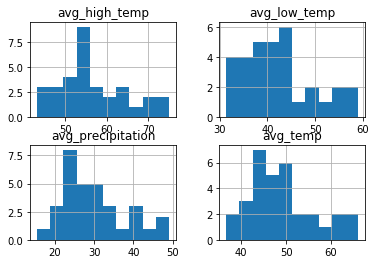

In [9]:
# check distribution of the weather related features
df_weather.hist();

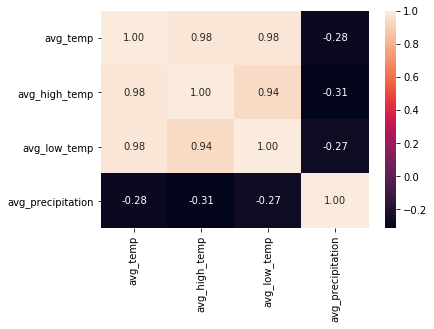

In [10]:
# the heatmap confirms that the 3 temperatures are positive correlated, and they are all negative 
# correlated to the avg precipitation, this confirms our initial definition of good weather

sns.heatmap(df_weather.corr(), annot=True, fmt=".2f");

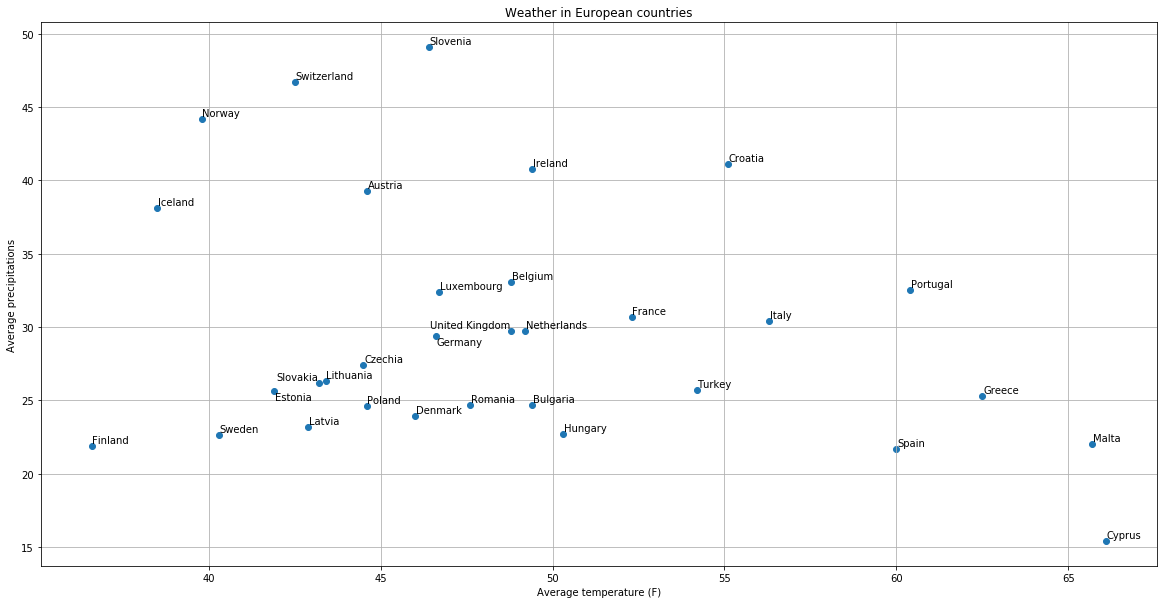

In [13]:
# let´s display the scatterplot of the countries related to average temperature and average precipitation
# to avoid overlapping labels the library https://github.com/Phlya/adjustText has been installed, imported and used

fig, ax = plt.subplots(figsize=(20, 10))

x = df_weather["avg_temp"]
y = df_weather["avg_precipitation"]
countries = df_weather["country"]

ax.scatter(x, y)

texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(countries)]
adjust_text(texts)
    
plt.title('Weather in European countries')
plt.xlabel('Average temperature (F)')
plt.ylabel('Average precipitations')

ax.grid(True);



Findings:
The countries with the best weather are in the Southern part of Europe (no surprise): Cyprus, Malta, Greece, Spain, Portugal and Italy

'- If you don´t like rain, avoid Slovenia
'- If you want a Nordics country and are sensitive to waether choose Sweden or Finland rather than Norway, at least is it not raining avery day
'- Despite of the bad reputation of United Kingdom as a rainy and foggy place, the average precipitations in this country is within the average of the other European countries
'- the average temperature correlates to the latitude of the country, the precipitations don´t (and could make a difference)


Does the weather influence the wealth of a country? First we need to display the weather as 1 dimension, then we can display on a 2-d chart if there is a correlation between the 2 variables.
To measure the wealth the first idea was to calculate the gdp for inhabitants, but since the gdp data are from 2016 and the inhabitants are from 2011, this could cause distortions. For this reason we measure the wealth as median_income in 2016. 

In [34]:
# initializing the pca
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
pca = decomposition.PCA()
# configuring the parameteres
# the number of components = 2

weather_features = df_weather.iloc[:, 1:]
weather_features = StandardScaler().fit_transform(weather_features)

pca.n_components = 1
pca_data = pca.fit_transform(weather_features)
# pca_reduced will contain the 1-d projects of simple data

pca_data

df_weather.iloc[:, 1]
df_weather_redux=pd.DataFrame(pca_data, columns=['weather_score']) 

country_names = list(df_europe["country"])
df_weather_redux['country'] = country_names
df_weather_redux_sorted = df_weather_redux.sort_values(by='weather_score', ascending=False)
df_weather_redux_sorted

,weather_score,country
12,4.178524,Cyprus
17,3.887319,Malta
7,2.995291,Greece
8,2.735173,Spain
21,2.526875,Portugal
11,1.576695,Italy
31,1.214324,Turkey
10,0.983813,Croatia
9,0.770420,France
16,0.479651,Hungary


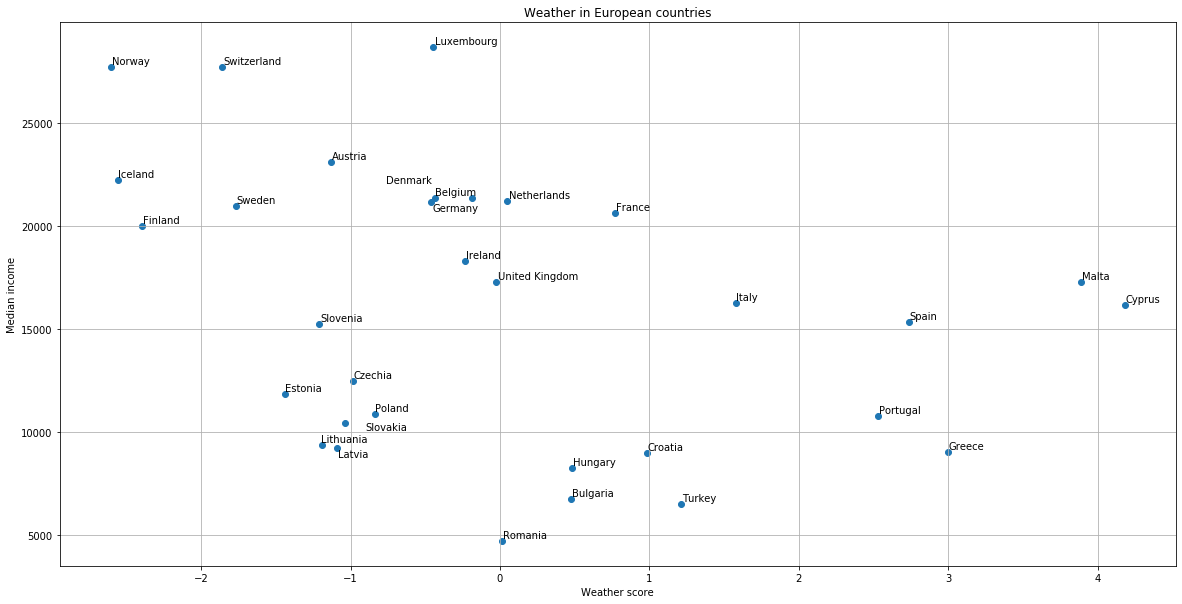

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))

x = df_weather_redux["weather_score"]
y = df_europe["median_income"]
countries = df_weather_redux["country"]

ax.scatter(x, y)

texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(countries)]
adjust_text(texts)
    
plt.title('Weather in European countries')
plt.xlabel('Weather score')
plt.ylabel('Median income')

ax.grid(True);


Findings: unfortunately there is a correlation between bad weather and wealth of European countries. Good choices to retire:
Luxembourg wealth is good, weather is not too bad, Malta or Cyprus weather is good, wealth is not too bad, France, Italy and Spain as a good compromise between the two aspects.